# Audiobooks

## Problem
We have a dataset from an audiobook app. The goal is to create a machine learning algorithm that, based on our data, can predict whether a customer will buy from the company again.

The data comes from an audiobook app, each customer in the database has made a purchase at least once. The data was gathered from the audiobook app, it represents 2 years of engagement. We have taken an extra six months of data after the two year period to check if the user converted, so, we take two years and six months of data. The first 2 years are contained in the dataset, the next six months show if a customer converted, so that if he/she bought another book, if that happened, we can count them as a conversion and the target will be one, otherwise, it is zero.

The main idea is that the company should not spend money targeting people who are unlikely to return.
If we focus on customers who are more likely to convert again, we will be able to increase sales figures and profitability.
The model should show us what are the most important metrics for a returning customer.

The data is described as follows:
* Customer ID: Identification of the customer 
* Book length in mins_avg (average of all purchases): Sum of the length of all purchases
* Book length in minutes_sum (sum of all purchases): Sum of the length divided by the number of purchases
* Price Paid_avg (average of all purchases): Sum of the price of all purchases
* Price paid_sum (sum of all purchases): Sum of the price divided by the number of purchases
* Review (a Boolean variable): Binary variable that provides if the customer gives a review
* Review (out of 10): It specifies the review of the customer om a scale from 1 to 10
* Total minutes listened: Quantity of minutes that a customer listens the book
* Completion (from 0 to 1): Total minutes listened divided by the total lenght of books a person has purchased
* Support requests (number): Total number of support requests the person has opened (forgotten passwords, assistance, etc)
* Last visited minutes purchase date (in days): Last time a person interacted with the platform and the first purchase date 
* Target: 1 if the person bought again in the last 6 months of data, 0 if the customer did not buy again.

INPUTS: Book length in mins_avg (average of all purchases), Book length in minutes_sum (sum of all purchases), Price Paid_avg (average of all purchases), Price paid_sum (sum of all purchases, Review (a Boolean variable), Review (out of 10), Total minutes listened, Completion (from 0 to 1), Support requests (number), Last visited minutes purchase date (in days).

OUTPUT: Target (binary)

## Task
Create a machine learning algorithm that can predict if the customer will buy again. 

In [21]:
import numpy as np
import pandas as pd

# We will use the sklearn preprocessing library, as it will be easier to standardize the data.
from sklearn import preprocessing
import tensorflow as tf
import seaborn as sns
import missingno as msno
#import hvplot.pandas 
import matplotlib.pyplot as plt


data=pd.read_csv(r"C:\Users\47406\Downloads\TensorFlow\audiobook_data_2.csv")
data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

# Get Column and Data Type Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               14084 non-null  int64  
 1   Book_length(mins)_overall        14084 non-null  float64
 2   Book_length(mins)_avg            14084 non-null  int64  
 3   Price_overall                    14084 non-null  float64
 4   Price_avg                        14084 non-null  float64
 5   Review                           14084 non-null  int64  
 6   Review10/10                      14084 non-null  float64
 7   Completion                       14084 non-null  float64
 8   Minutes_listened                 14084 non-null  float64
 9   Support_Request                  14084 non-null  int64  
 10  Last_Visited_mins_Purchase_date  14084 non-null  int64  
 11  Target                           14084 non-null  int64  
dtypes: float64(6), int

In [22]:
# Get Overview of Data
#des= data.describe()
data.describe()

,ID,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


## EXPLORATORY DATA ANALYSIS

ID                                 0.0
Book_length(mins)_overall          0.0
Book_length(mins)_avg              0.0
Price_overall                      0.0
Price_avg                          0.0
Review                             0.0
Review10/10                        0.0
Completion                         0.0
Minutes_listened                   0.0
Support_Request                    0.0
Last_Visited_mins_Purchase_date    0.0
Target                             0.0
dtype: float64
the initial null percentage for each feature [%]
ID                                 0.0
Book_length(mins)_overall          0.0
Book_length(mins)_avg              0.0
Price_overall                      0.0
Price_avg                          0.0
Review                             0.0
Review10/10                        0.0
Completion                         0.0
Minutes_listened                   0.0
Support_Request                    0.0
Last_Visited_mins_Purchase_date    0.0
Target                             0.0


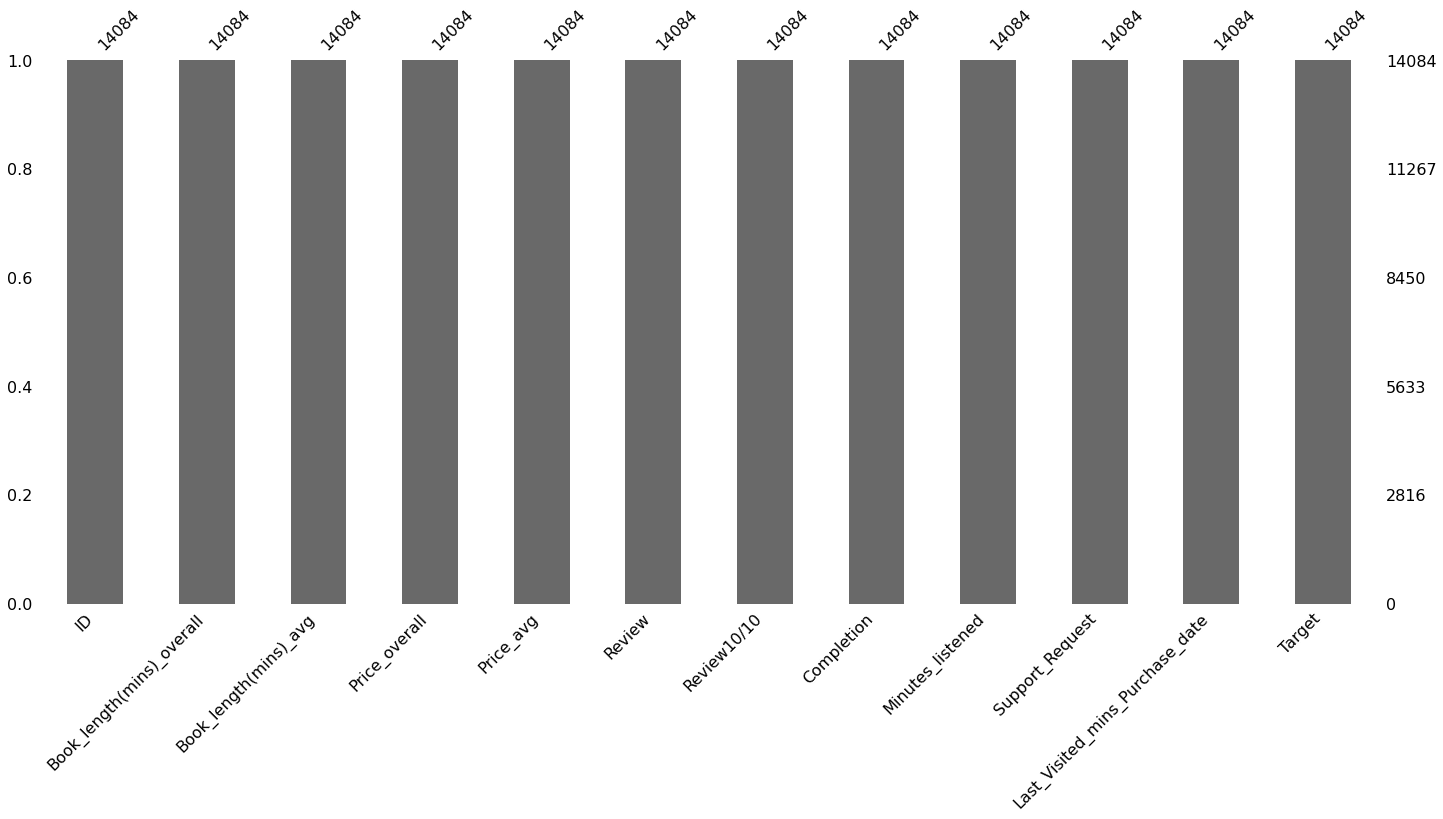

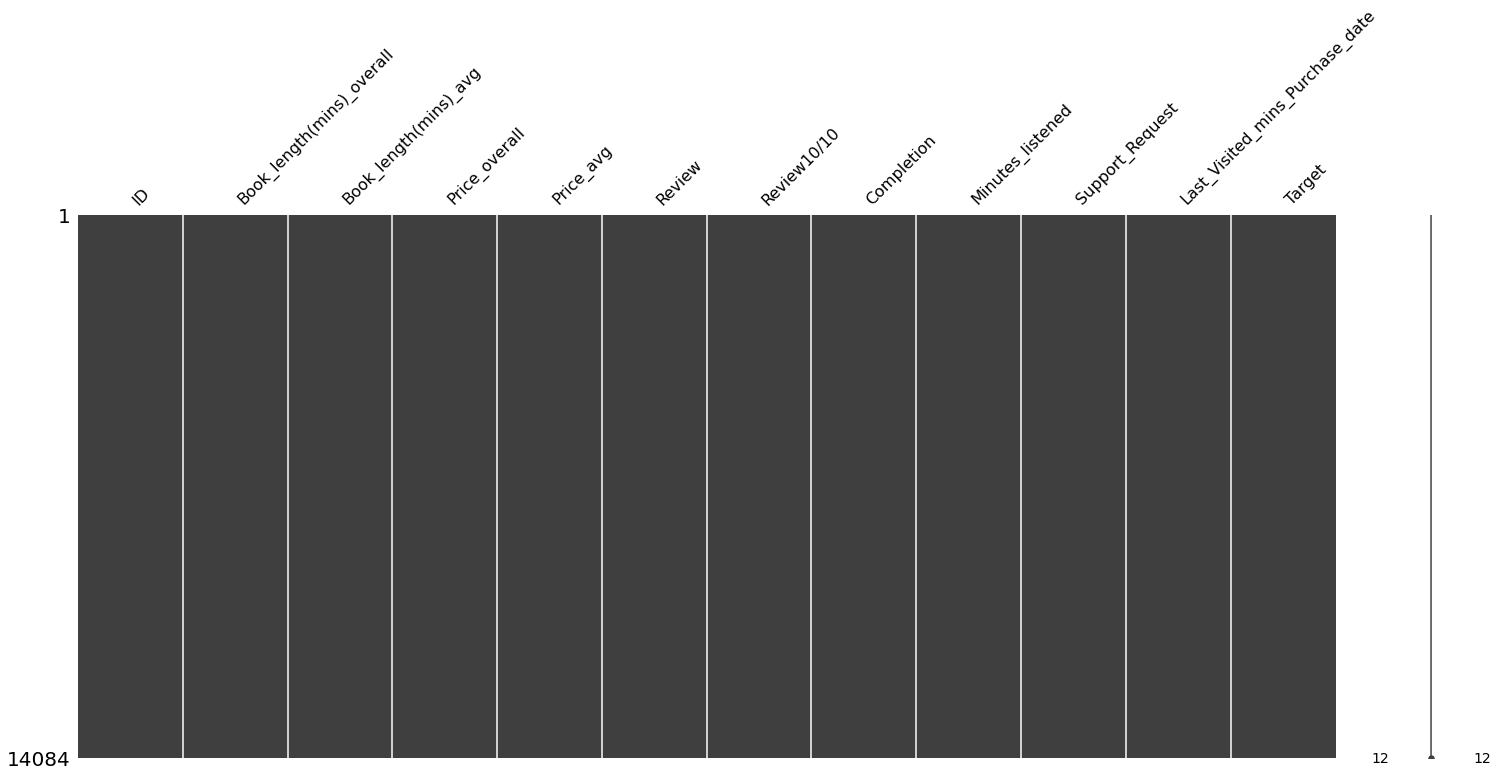

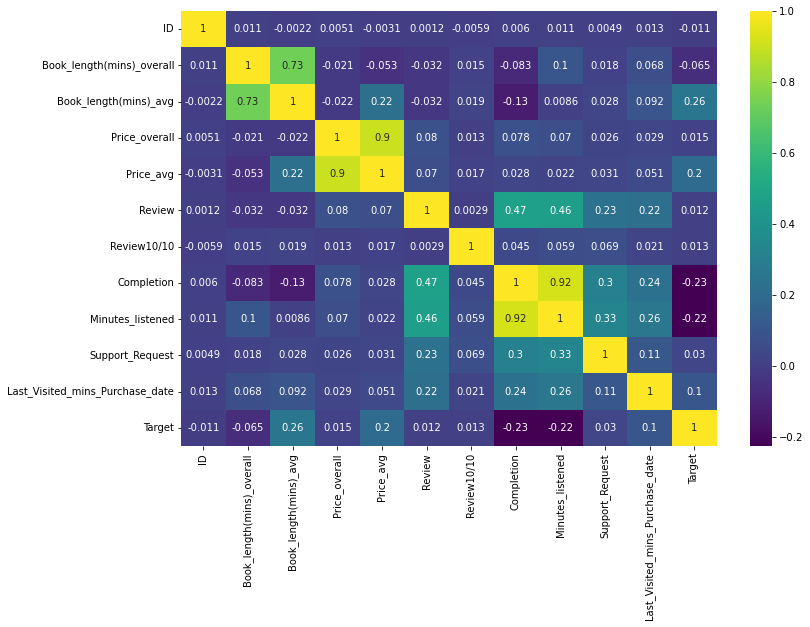

In [23]:
#Understanding and visualizing the data

msno.bar(data)
msno.matrix(data)

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

ini_col=data.columns
def nullPercentage(df):
    print(round((df.isnull().sum() / len(df.index) * 100), 2))
    
    
nullPercentage(data)
print('the initial null percentage for each feature [%]')


# Drop Column based on Null Percentage Criteria
temp_df = pd.DataFrame(round((data.isnull().sum() / len(data.index) * 100), 2))

column = (temp_df.loc[temp_df[0] > 7].index).tolist()

data_clean = data.drop(columns=column, axis=1)

nullPercentage(data_clean)
print('the final null percentage for each feature [%]')

# drop null rows
data_clean = data_clean.dropna()


In [21]:
#Explore the columns and the features

data['Book_length(mins)_overall'].value_counts()


2160.000000    4712
1620.000000    4149
1188.000000    2851
648.000000      712
1080.000000     567
324.000000      300
540.000000      115
1404.000000     112
1890.000000     110
1674.000000      98
1134.000000      52
216.000000       51
1656.000000      27
1476.000000      23
1350.000000      21
756.000000       21
918.000000       15
1332.000000      14
1242.000000      13
864.000000       13
1296.000000      10
1152.000000       8
1116.000000       7
972.000000        7
486.000000        6
1377.000000       5
1368.000000       5
1512.000000       5
1224.000000       5
1044.000000       4
432.000000        4
594.000000        4
1008.000000       3
702.000000        3
684.000000        3
504.000000        2
576.000000        2
1161.000000       2
1269.000000       2
928.800000        1
1252.800000       1
1440.000000       1
1339.200000       1
990.000000        1
378.000000        1
945.000000        1
828.000000        1
1431.000000       1
720.000000        1
612.000000        1


In [24]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0

data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [25]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

In [28]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

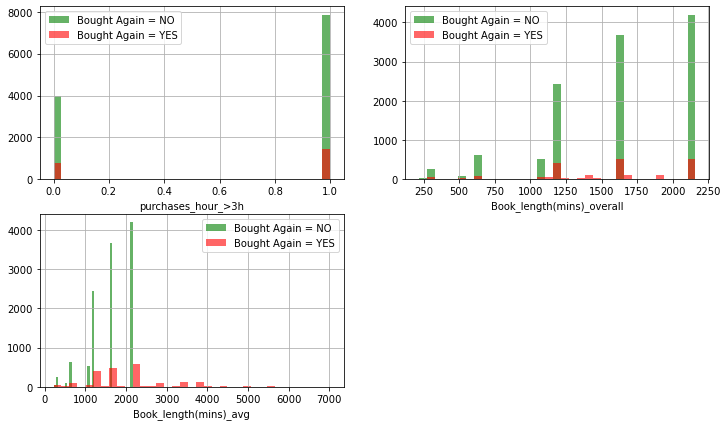

In [53]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='green', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


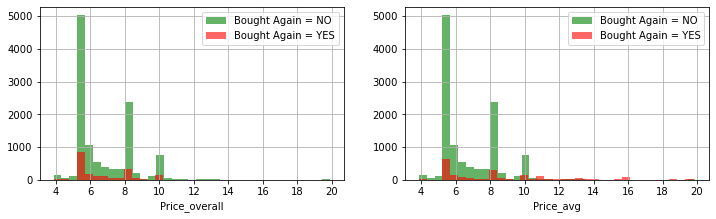

In [54]:
columns2 = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns2, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='green', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

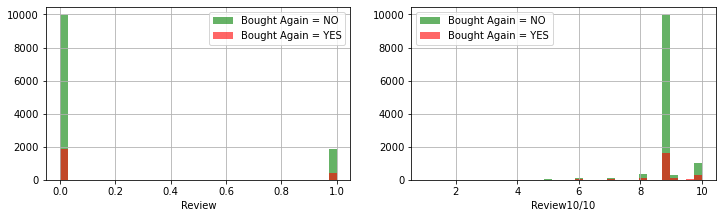

In [55]:
columns4 = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns4, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='green', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

0    11847
1     2237
Name: Target, dtype: int64


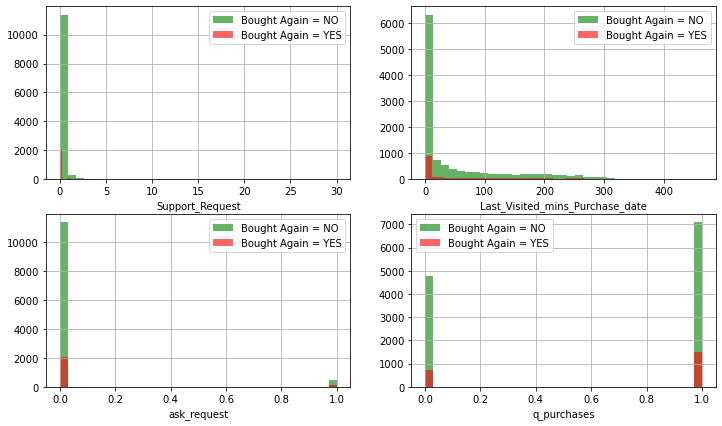

In [56]:
def ask_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["ask_request"] = data.Support_Request.apply(ask_request)

def q_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['q_purchases'] = data.Last_Visited_mins_Purchase_date.apply(q_purchases)

columns5 = ["Support_Request", "Last_Visited_mins_Purchase_date", "ask_request", "q_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns5, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='green', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    
print(data['Target'].value_counts())

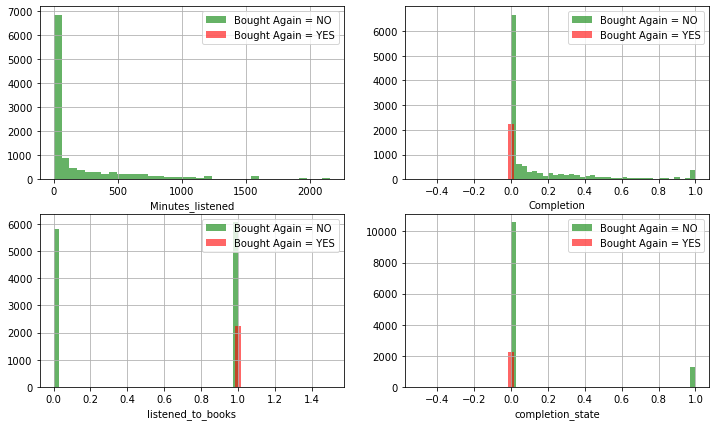

In [57]:
columns6 = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns6, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='green', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<AxesSubplot:>

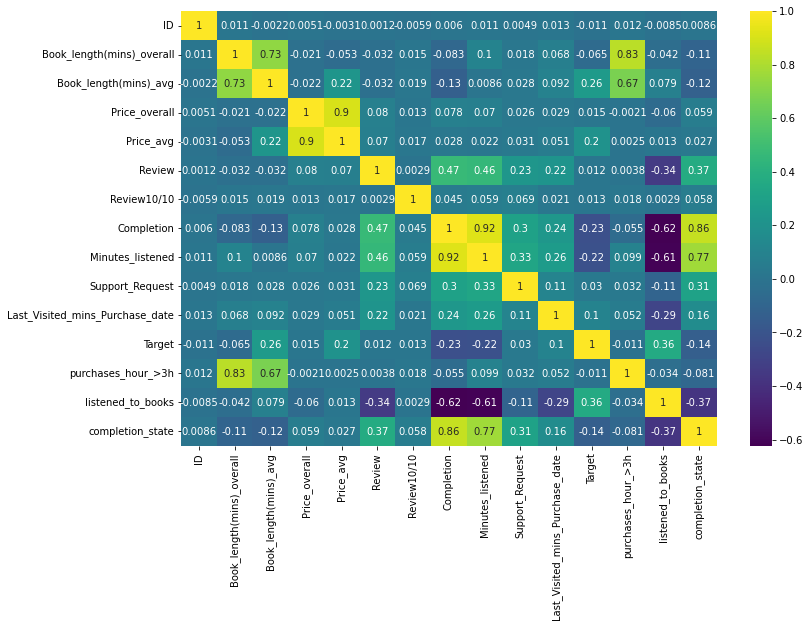

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [36]:
#Take the initial dataset to start the algorithm

datai=pd.read_csv(r"C:\Users\47406\Downloads\TensorFlow\audiobook_data_2.csv")
dataf = datai.values

unscaled_inputs = dataf[:,1:-1]

# The targets are in the last column. That's how datasets are conventionally organized.
targets = dataf[:,-1]


In [35]:
#Balance the dataset
# Count how many targets are 1 (meaning that the customer did convert)
num_targets = int(np.sum(targets))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_count = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
#It is important to notice that our target variable is inbabalanced. We have only 2237 user who convert again in the 6 month period. The data need to be balanced.
indices_to_remove = []

# Count the number of targets that are 0. 
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets.shape[0]):
    if targets[i] == 0:
        zero_targets_count += 1
        if zero_targets_count > num_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets, indices_to_remove, axis=0)



In [37]:
#Standardize the inputs

# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs, as we explained in one of the lectures.
# At the end of the business case, you can try to run the algorithm WITHOUT this line of code. 
# The result will be interesting.
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In [38]:
#Shuffle the data

# When the data was collected it was actually arranged by date
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]


## Split the dataset into training, validation and test

In [39]:
#Split the dataset into training, validation and test

# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)


1781.0 3579 0.49762503492595694
226.0 447 0.5055928411633109
230.0 448 0.5133928571428571


In [40]:
#%%# Save the three datasets in *.npz. 
np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

In [42]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('Audiobooks_data_train.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(np.int)

# we load the validation data in the temporary variable
npz = np.load('Audiobooks_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# we load the test data in the temporary variable
npz = np.load('Audiobooks_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

C:\Users\47406\AppData\Local\Temp/ipykernel_16884/2700424899.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_inputs = npz['inputs'].astype(np.float)
C:\Users\47406\AppData\Local\Temp/ipykernel_16884/2700424899.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

## MODEL

In [62]:
# Set the input and output sizes
input_size = 10 #Predictors
output_size = 2 #Binary outputs
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we would like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#sparse categorical due to the implementation of one hot encoding

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  


Epoch 1/100
36/36 - 0s - loss: 0.5792 - accuracy: 0.6966 - val_loss: 0.5151 - val_accuracy: 0.7517
Epoch 2/100
36/36 - 0s - loss: 0.4686 - accuracy: 0.7639 - val_loss: 0.4362 - val_accuracy: 0.7785
Epoch 3/100
36/36 - 0s - loss: 0.4153 - accuracy: 0.7924 - val_loss: 0.3930 - val_accuracy: 0.8233
Epoch 4/100
36/36 - 0s - loss: 0.3862 - accuracy: 0.8047 - val_loss: 0.3766 - val_accuracy: 0.7875
Epoch 5/100
36/36 - 0s - loss: 0.3724 - accuracy: 0.8005 - val_loss: 0.3626 - val_accuracy: 0.8233
Epoch 6/100
36/36 - 0s - loss: 0.3639 - accuracy: 0.8083 - val_loss: 0.3554 - val_accuracy: 0.8009
Epoch 7/100
36/36 - 0s - loss: 0.3547 - accuracy: 0.8092 - val_loss: 0.3486 - val_accuracy: 0.8143
Epoch 8/100
36/36 - 0s - loss: 0.3481 - accuracy: 0.8159 - val_loss: 0.3443 - val_accuracy: 0.8054
Epoch 9/100
36/36 - 0s - loss: 0.3440 - accuracy: 0.8145 - val_loss: 0.3466 - val_accuracy: 0.7964
Epoch 10/100
36/36 - 0s - loss: 0.3393 - accuracy: 0.8150 - val_loss: 0.3381 - val_accuracy: 0.8054
Epoch 11/

In [63]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

14/14 [==============================] - 0s 938us/step - loss: 0.3451 - accuracy: 0.8438

Test loss: 0.35. Test accuracy: 84.38%
